# Deep Learning
# DL06 PM2.5_Prediccion_MLP

## <font color='blue'>**Multilayer preceptron aplicado a series de tiempo univariadas**</font>
<p style='text-align: justify;'>

Una serie de tiempo es una serie de puntos de datos indexados (o listados o graficados) en orden de tiempo. Más comúnmente, una serie de tiempo es una secuencia tomada en sucesivos puntos equidistantes en el tiempo. Por lo tanto, es una secuencia de datos de tiempo discreto. Ejemplos de series temporales son las alturas de las mareas oceánicas, los recuentos de manchas solares y el valor de cierre diario del Promedio Industrial Dow Jones.

Las series temporales se trazan con mucha frecuencia a través de gráficos de líneas. Las series de tiempo se usan en estadística, procesamiento de señales, reconocimiento de patrones, econometría, finanzas matemáticas, pronóstico del tiempo, predicción de terremotos, electroencefalografía, ingeniería de control, astronomía, ingeniería de comunicaciones y en gran medida en cualquier dominio de la ciencia aplicada y la ingeniería que involucra mediciones temporales.

El término "serie temporal univariadas" se refiere a una serie temporal que consiste en observaciones individuales (escalares) registradas secuencialmente en incrementos de tiempo iguales.
    
En este notebook, utilizaremos un perceptrón multicapa para desarrollar modelos de pronóstico de series temporales univariadas.
El conjunto de datos utilizado para los ejemplos de este notebook es sobre la contaminación del aire medida por la concentración de material particulado (PM) de diámetro menor o igual a 2.5 micrómetros. Hay otras variables
tales como presión de aire, temperatura del aire, punto de rocío, que tambien serán utilizadas para realizar predicciones.
</p>

En este caso, se desarrollará un modelo de series temporales: para la predicción de pm2.5.
El notebook se divide en la siguiente etapas:
1. Visualización de la data
2. Procesamiento de la data
3. Construcción del modelo y su entrenamiento
4. Resultados y validación del modelo. 


Importancia de la predicción del material particulado:

<p style='text-align: justify;'>
El material particulado respirable presente en la atmósfera de nuestras ciudades en forma sólida o líquida (polvo, cenizas, hollín, partículas metálicas, cemento y polen, entre otras) se puede dividir, según su tamaño, en dos grupos principales. A las de diámetro aerodinámico igual o inferior a los 10 µm o 10 micrómetros (1 µm corresponde a la milésima parte de un milímetro) se las denomina PM10 y a la fracción respirable más pequeña, PM2,5. Estas últimas están constituidas por aquellas partículas de diámetro aerodinámico inferior o igual a los 2,5 micrómetros, es decir, son 100 veces más delgadas que un cabello humano 
</p>

El conjunto de datos se ha descargado del Repositorio de aprendizaje automático de UCI.

https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

### Etapa 1: Visualización de la data

<p style='text-align: justify;'>
En esta etapa nos hacemos una idea de como es la distribución de la data. Entre que valores fluctua,  en el caso de las series de tiempo univariadas, es natural realizar Boxplots y graficos de tiempo. Las librerías tipicas que utilizaremos en esta etapa son: pandas, matplotlib, numpy y seaborn.
</p>

In [ ]:
from __future__ import print_function
import os
import sys
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [ ]:
#set current working directory
# path = '/content/drive/MyDrive/Cursos/Data Science UDD/Deep Learning/PRSA_data_2010.1.1-2014.12.31.csv'
# os.chdir(path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Read the dataset into a pandas.DataFrame
df = pd.read_csv('/content/drive/MyDrive/Cursos/Data Science UDD/Deep Learning/PRSA_data_2010.1.1-2014.12.31.csv')

## <font color='green'>**Actividad 1**</font>

En esta actividad queremos visualizar nuestra data.  (30 minutos)

1. ¿Cuantos valores nulos tenemos?, como los podemos tratar. ¿Probemos borrando data?

2. Cree una columna que se llame datetime y ordenelo en forma ascendente. Puede mirar el siguiente codigo para inspirarse.

```
df['datetime'] = df[['year', 'month', 'day', 'hour']].apply(lambda row: datetime.datetime(year=row['year'], month=row['month'], day=row['day'],
                                                                                          hour=row['hour']), axis=1)
df.sort_values('datetime', ascending=True, inplace=True)
```

3. Visualice la serie de tiempo para la variable pm2.5. (Graficos de linea, box plots e histograma). Visualice distintos periodos de tiempo, se observa el tamaño del ciclo?



In [ ]:
# Numero de datos faltantes. 
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [ ]:
df.shape

(43824, 13)

In [ ]:
df.dtypes

No         int64
year       int64
month      int64
day        int64
hour       int64
pm2.5    float64
DEWP       int64
TEMP     float64
PRES     float64
cbwd      object
Iws      float64
Is         int64
Ir         int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [ ]:
df.apply(lambda x: sum(pd.isnull(x)), axis = 0)

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

#### Datos faltantes:
<p style='text-align: justify;'>
En los datos de series de tiempo, si faltan valores, hay dos formas de tratar los datos incompletos:

1. Omita todo el registro que contiene información.
2. Imputar la información que falta.

Dado que los datos de series temporales tienen propiedades temporales, solo algunas de las metodologías estadísticas son apropiadas para los datos de series temporales.

Metodos elementales de imputación:
1. Mean imputation
2. Median imputation
3. Mode imputation
4. calucate the appropriate measure and replace NAs with the values.
5. Modelos estadisticos y de Machine Leaning.
<\p>

In [ ]:
# En este caso los vamos a eliminar.

In [ ]:
df.dropna(subset=['pm2.5'], inplace = True)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.shape

(41757, 13)

<p style='text-align: justify;'>
En las series de tiempo el orden es fundamental. 
Para asegurarse de que las filas estén en el orden correcto de fecha y hora de las observaciones, se crea una nueva columna fecha y hora a partir de las columnas relacionadas con la fecha y la hora del Marco de datos.
La nueva columna consta de los objetos DateTime.datetime de Python. El DataFrame se ordena en orden ascendente sobre esta columna.
    </p>

In [ ]:
df[['year', 'month', 'day', 'hour']]

,year,month,day,hour
0,2010,1,2,0
1,2010,1,2,1
2,2010,1,2,2
3,2010,1,2,3
4,2010,1,2,4
...,...,...,...,...
41752,2014,12,31,19
41753,2014,12,31,20
41754,2014,12,31,21
41755,2014,12,31,22


In [ ]:
# Cree df['datetime'] a partir de  df[['year', 'month', 'day', 'hour']] y ordenenlos.

df['datetime'] = df[['year', 'month', 'day', 'hour']].apply(lambda row: datetime.datetime(year=row['year'], month=row['month'], day=row['day'],
                                                                                          hour=row['hour']), axis=1)
df.sort_values('datetime', ascending=True, inplace=True)

df.datetime

0       2010-01-02 00:00:00
1       2010-01-02 01:00:00
2       2010-01-02 02:00:00
3       2010-01-02 03:00:00
4       2010-01-02 04:00:00
                ...        
41752   2014-12-31 19:00:00
41753   2014-12-31 20:00:00
41754   2014-12-31 21:00:00
41755   2014-12-31 22:00:00
41756   2014-12-31 23:00:00
Name: datetime, Length: 41757, dtype: datetime64[ns]

<p style='text-align: justify;'>
Un box plot es una forma estandarizada de mostrar la distribución de datos basada en un resumen de cinco números 
("mínimo", primer cuartil (Q1), mediana, tercer cuartil (Q3) y "máximo"). Puede informarle sobre sus valores atípicos 
y cuáles son sus valores. También puede decirle si sus datos son simétricos, qué tan estrechamente están agrupados, y si sus datos están sesgados.</p>
<p style='text-align: justify;'>
Necesita tener información sobre la variabilidad o dispersión de los datos. Un box plot es un gráfico que le da una buena indicación de cómo se distribuyen los valores en los datos. Aunque los box plots pueden parecer primitivos en comparación con un histograma o gráfico de densidad, tienen la ventaja de ocupar menos espacio, lo cual es útil al comparar distribuciones entre muchos grupos o conjuntos de datos.</p>

![Funcion logistica](https://drive.google.com/uc?export=view&id=1pd8fVkKl7jl-YtHVpyYdWkX9FHRE30lm)





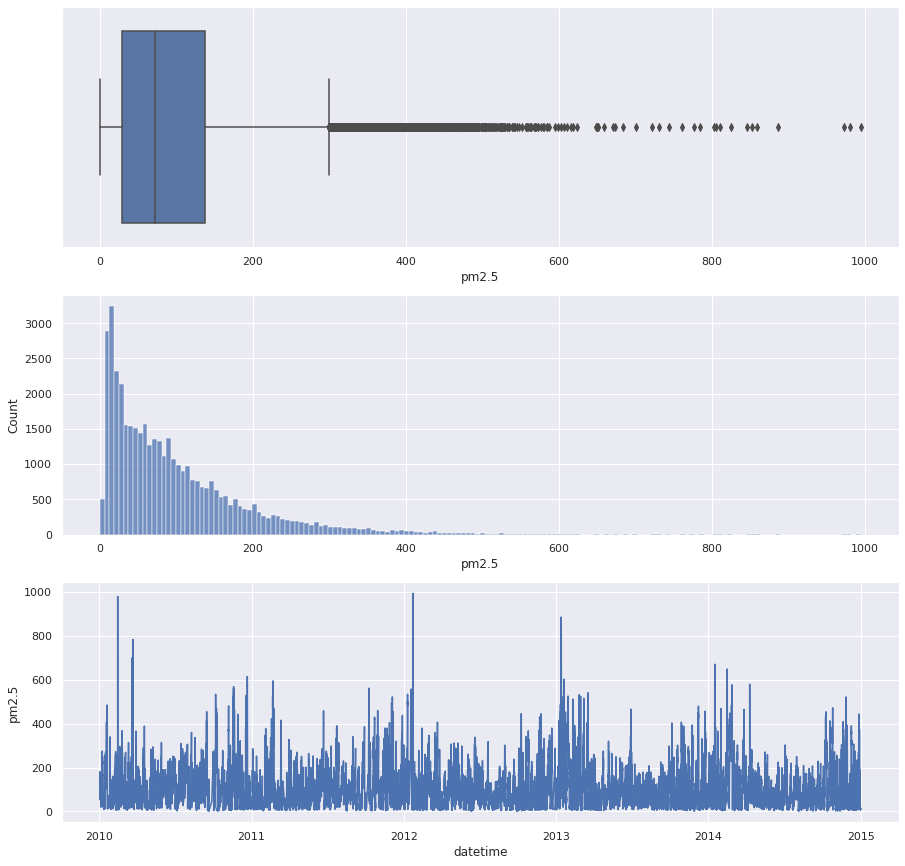

In [ ]:
# Visualice un Boxplot de pm2.5 y de alguna de las otras variables si tiene interes. 
# 3 Realice un grafico de linea de la serie completa. 
sns.set_theme()
import seaborn as sns
fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (15, 15))
sns.boxplot(x = 'pm2.5', data = df, ax = ax[0])
sns.histplot(data = df, x = 'pm2.5', ax = ax[1])
sns.lineplot(x= 'datetime', y = 'pm2.5', data = df, ax  =ax[2]);

In [ ]:
df['datetime'].tail()

41752   2014-12-31 19:00:00
41753   2014-12-31 20:00:00
41754   2014-12-31 21:00:00
41755   2014-12-31 22:00:00
41756   2014-12-31 23:00:00
Name: datetime, dtype: datetime64[ns]

In [ ]:
from dateutil.relativedelta import relativedelta

desde = df['datetime'].iloc[-1] + relativedelta(months=-6)
desde1m = df['datetime'].iloc[-1] + relativedelta(months=-1)

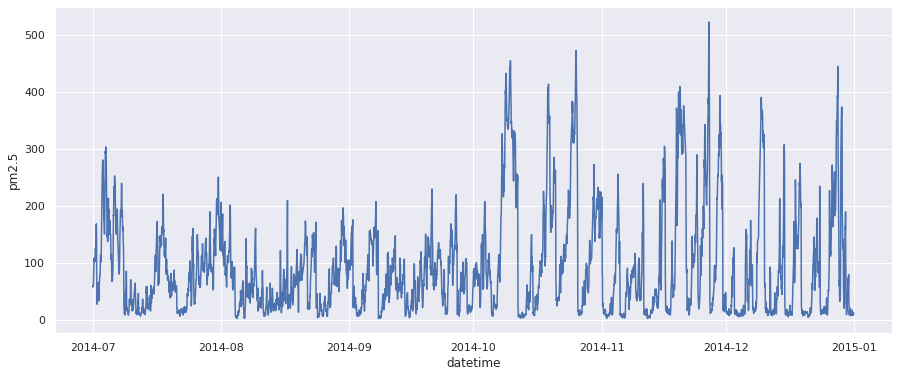

In [ ]:
# Dibujemos la serie para los 6 primeros meses y veamos si existe algun patron.
plt.figure(figsize = (15, 6))
sns.lineplot(x= 'datetime', y = 'pm2.5', data = df[df['datetime']>= desde]);

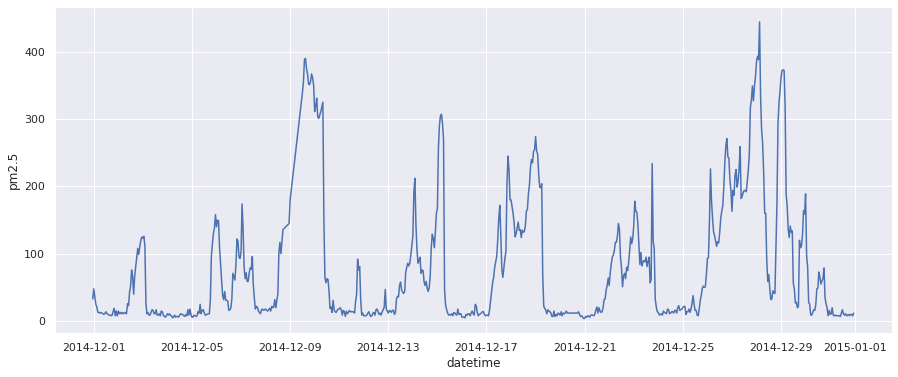

In [ ]:
# Miremos el caso de un mes. 
plt.figure(figsize = (15, 6))
sns.lineplot(x= 'datetime', y = 'pm2.5', data = df[df['datetime']>= desde1m]);

<font color='green'>**Fin Actividad 1**</font>

### Etapa 2 Preprocesamiento de la data
<p style='text-align: justify;'>
En esta segunda etapa preparamos los datos con el objetivo de realizar un entrenamiento robusto de nuestra red neuronal. Usualmente los datos como primera etapa se normalizan. Empiricamente se ha observando que los datos normalizados (No siempre) generan modelos de clasificiación y de regresión con mejores metricas que los no normalizadas. Por otra parte, Los algoritmos de descenso de gradiente funcionan mejor (por ejemplo, convergen más rápido) si las variables están dentro del rango [-1, 1]. Muchas fuentes relajan el límite incluso [-3, 3].</p>
<p style='text-align: justify;'>
Posteriormente los datos debens ser separados en tres conjuntos: Entrenamiento, validación y test. Usualmente el ultimo de test se utiliza con una prueba nueva de datos. Finalmente debemos construir el conjunto de vectores que serán utilizados para entrenar la red neuronal perceptron multicapa. Las librerias. Adicionalmente en esta sección utilizaremos la librería sklearn para realizar la normalización.
</p>

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df['scaled_pm2.5'] = scaler.fit_transform(np.array(df['pm2.5']).reshape(-1, 1)) # Nos lo deja como vector.

In [ ]:
# Guardemos el escalador
import joblib
fileoutScaler = 'scaler_model.sav'
joblib.dump({'scaler': scaler}, './' + fileoutScaler)

['./scaler_model.sav']

```python
# buena practica
joblib.dump({'scaler': scaler, 'model': model, 'info': 'esto contiene el scaler y el modelo'}, './' + fileoutScaler)
```

<p style='text-align: justify;'>
Antes de entrenar el modelo, el conjunto de datos se divide en dos partes: conjunto de entrenamiento y conjunto de validación.
La red neuronal se entrena en el conjunto de entrenamiento. Esto significa el cálculo de la función de pérdida, backpropagation 
y los pesos actualizados por un algoritmo de descenso de gradiente se realizan en el conjunto de entrenamiento. El conjunto de validación se utiliza para evaluar el modelo y para determinar el número de epochs en el entrenamiento del modelo. Aumentando el número de epochs disminuirán aún más la función de pérdida en el conjunto de entrenamiento, pero es posible que no necesariamente tengan el mismo efecto para el conjunto de validación debido al sobreajuste en el conjunto de entrenamiento. Utilizamos Keras con el backend Tensorflow para definir y entrenar el modelo. Todos los pasos involucrados en la capacitación y validación del modelo se realizan llamando a las funciones apropiadas de la API de Keras.
 </p>

In [ ]:
"""
Comencemos dividiendo el conjunto de datos en entrenamiento y validación. El período de tiempo del conjunto de datos si es de
1 de enero de 2010 al 31 de diciembre de 2014. Los primeros cuatro años: 2010 a 2013 se utiliza como entrenamiento y
2014 se mantiene para validación.
"""
# Utilizamos pandas para realizar este proceso. 
split_date = datetime.datetime(year=2014, month=1, day=1, hour=0)
df_train = df.loc[df['datetime']<split_date]
df_val = df.loc[df['datetime']>=split_date]
print('Shape of train:', df_train.shape)
print('Shape of test:', df_val.shape)

Shape of train: (33096, 15)
Shape of test: (8661, 15)


In [ ]:
#Miremos nuestro conjunto de entrenamiento
df_train.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,scaled_pm2.5
0,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00,0.129779
1,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00,0.148893
2,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00,0.159960
3,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00,0.182093
4,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00,0.138833


In [ ]:
#Miremos nuestro conjunto de validación
df_val.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,scaled_pm2.5
33096,35065,2014,1,1,0,24.0,-20,7.0,1014.0,NW,143.48,0,0,2014-01-01 00:00:00,0.024145
33097,35066,2014,1,1,1,53.0,-20,7.0,1013.0,NW,147.50,0,0,2014-01-01 01:00:00,0.053320
33098,35067,2014,1,1,2,65.0,-20,6.0,1013.0,NW,151.52,0,0,2014-01-01 02:00:00,0.065392
33099,35068,2014,1,1,3,70.0,-20,6.0,1013.0,NW,153.31,0,0,2014-01-01 03:00:00,0.070423
33100,35069,2014,1,1,4,79.0,-18,3.0,1012.0,cv,0.89,0,0,2014-01-01 04:00:00,0.079477


In [ ]:
#Vamos a resetar los indices para ser ordenados 
df_val.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Valores escalados de pm2.5')

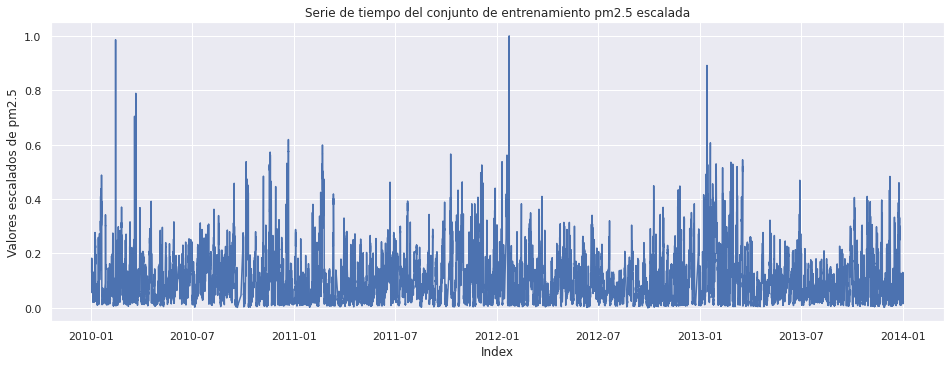

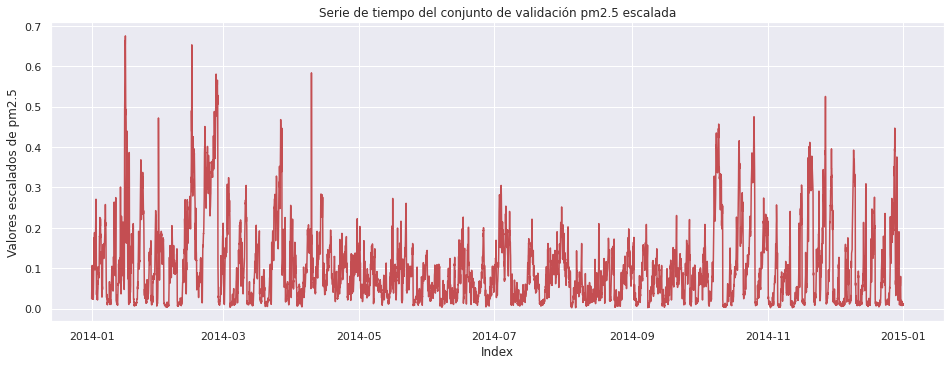

In [ ]:
"""
El conjunto de entrenamiento y validación lo volvemos a dibujar. 
"""

plt.figure(figsize=(16, 5.5))
g = sns.lineplot(df['datetime'],df_train['scaled_pm2.5'], color='b')
g.set_title('Serie de tiempo del conjunto de entrenamiento pm2.5 escalada')
g.set_xlabel('Index')
g.set_ylabel('Valores escalados de pm2.5')

plt.figure(figsize=(16, 5.5))
g = sns.lineplot(df_val['datetime'],df_val['scaled_pm2.5'], color='r')
g.set_title('Serie de tiempo del conjunto de validación pm2.5 escalada')
g.set_xlabel('Index')
g.set_ylabel('Valores escalados de pm2.5')

<p style='text-align: justify;'>
Ahora necesitamos generar vectores (X) y una variable objetivo (y) para entrenar y validar. La matriz de los regresores o variables independientes y la matriz  de la variable dependiente se crean a partir de la matriz 1-D original de la columna scaled_pm2.5. Para el modelo de pronóstico de series de tiempo, los últimos siete días de observaciones se utilizan para predecir el día siguiente, este valor se estudia y se pueden ejercitar distintas ventanas de tiempo. el dia 7 surge de la observación de los gráficos de linea.  Definimos una función que toma la serie de tiempo original y el número de pasos de tiempo en los regresores como entrada para generar las matrices de X e y. </p>

In [ ]:
def makeXy(ts, nb_timesteps):
    """
    Input: 
           ts: serie de tiempo original.
           nb_timesteps: Ventana de tiempo.
    Output: 
           X: 2-D array de los regresores o variables independientes.
           y: 1-D array de variable dependiente. 
    """
    X = []
    y = []
    for i in range(nb_timesteps, ts.shape[0]): 
        X.append(list(ts.loc[i-nb_timesteps:i-1]))
        y.append(ts.loc[i])
    X, y = np.array(X), np.array(y) # Lo tranformamos a nparray
    return X, y

In [ ]:
X_train, y_train = makeXy(ts = df_train['scaled_pm2.5'], nb_timesteps = 7)
print('Shape of train arrays:', X_train.shape, y_train.shape)

Shape of train arrays: (33089, 7) (33089,)


In [ ]:
X_val, y_val = makeXy(df_val['scaled_pm2.5'], 7)
print('Shape of validation arrays:', X_val.shape, y_val.shape)

Shape of validation arrays: (8654, 7) (8654,)


### Definiendo el modelo de perceptron de multicapa 
<p style='text-align: justify;'>
Un solo perceptrón solo se puede utilizar para implementar funciones separables linealmente. Toma entradas reales y booleanas y les asocia un conjunto de pesos, junto con un sesgo (el umbral que mencioné anteriormente). Aprendemos los pesos, obtenemos la función. Usemos un perceptrón para aprender una función OR. </p>

![Perceptron](https://drive.google.com/uc?export=view&id=1Kp8OYWpZbPX3PNkbsw154Q8KOqbdicuf)



![Perceptron Matematica](https://drive.google.com/uc?export=view&id=1_RhrJBSBSsjbpc89XGrX32VDec7WmLXA)


<p style='text-align: justify;'>
Como su nombre indica, el MLP es esencialmente una combinación de capas de perceptrones entrelazados. Utiliza las salidas de la primera capa como entradas de la siguiente capa hasta que finalmente, después de un número particular de capas, alcanza la capa de salida. Las capas entre las capas de entrada y salida se denominan capas ocultas. Al igual que con el perceptrón, MLP también tiene pesos que se deben ajustar para entrenar el sistema. Estos pesos ahora vienen en forma de matriz en cada unión entre capas. </p>



![MLP](https://drive.google.com/uc?export=view&id=15L2S9jFGi_j7E2KNK2p6Gno1_xKZbeQP)


<p style='text-align: justify;'>
La primera parte de la creación de un MLP es definir una topología y desarrollar el algoritmo feedforward. Feedforward es esencialmente el proceso utilizado para convertir la entrada en una salida. Sin embargo, no es tan simple como en el perceptrón, ya que ahora necesita iterar sobre varias capas. Usando operaciones matriciales</p>

Ahora definimos el MLP usando el framework de redes neuronales Keras. En este enfoque, una capa se puede declarar como la entrada de la siguiente capa al momento de definir la siguiente capa.

In [ ]:
from keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from keras.models import Model, Sequential
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanAbsoluteError

In [ ]:
#Defina la capa de entrada que tiene forma (, 7) y de tipo float32. Ninguno indica el número de instancias
input_layer = Input(shape=(7,), dtype='float32')
input_layer

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'input_1')>

#### Funciones de activación

La función de activación no es más que una función matemática que toma una entrada y produce una salida. La función se activa cuando el resultado calculado alcanza el umbral especificado.
![Funcion Activacion](https://drive.google.com/uc?export=view&id=1w3slknVN9VGDmQzHDoPxhRCQZ1xFwmvN)



In [ ]:
#Las capas densas se definen con activación tanh.
# nn.Linear(7, 32)
dense1 = Dense(32, activation='tanh')(input_layer) # llamamos nuestra neurona como una función con el input como argumento
# nn.Linear(32, 16)
dense2 = Dense(16, activation='tanh')(dense1) # llamamos nuestra neurona como una función con la capa anterior como argumento
# nn.Linear(16, 16)
dense3 = Dense(16, activation='tanh')(dense2)

### Dropout
<p style='text-align: justify;'>
Múltiples capas ocultas y una gran cantidad de neuronas en cada capa oculta les da a las redes neuronales la capacidad de modelar la no linealidad compleja de las relaciones subyacentes entre los regresores y el objetivo. Sin embargo, las redes neuronales profundas también pueden sobreajustar los datos de validación y dar malos resultados en la validación o el conjunto de pruebas. El dropout se ha utilizado efectivamente para regularizar redes neuronales profundas. En este ejemplo, se agrega una capa de Salida antes de la capa de salida. El dropout establece aleatoriamente p fracción de neuronas de entrada a cero antes de pasar a la siguiente capa. La eliminación aleatoria de entradas actúa esencialmente como un tipo de agrupamiento o metamodelo bagging.  Usamos p = 0.2 para abandonar el 20% de las características de entrada seleccionadas al azar.</p>

<p style='text-align: justify;'>
En el aprendizaje automático, la regularización es una forma de evitar el sobreajuste. La regularización reduce el sobreajuste al agregar una penalización a la función de pérdida. Al agregar esta penalización, el modelo se entrena de tal manera que no aprende pesos de conjunto de características interdependientes. Aquellos de ustedes que conocen la Regresión logística pueden estar familiarizados con las penalizaciones L1 (Laplaciana) y L2 (Gaussiana).</p>

![Dropout](https://drive.google.com/uc?export=view&id=1WwBQnaNmT2CfkPR439-uR_5pOy-kAluK)


El dropout obliga a una red neuronal a aprender características más robustas que son útiles junto con muchos subconjuntos aleatorios diferentes de las otras neuronas. 

In [ ]:
dropout_layer = Dropout(0.2)(dense3)

In [ ]:
# Finalmente, la capa de salida da predicción para la presión de aire del día siguiente.
# nn.Linear(16, 1)
output_layer = Dense(1, activation='linear')(dropout_layer) # la activación es lineal, pues es una regresión

Las capas de entrada, densa y de salida ahora se empaquetarán dentro de un Modelo, que es una clase envolvente para entrenar y hacer predicciones. El box plot de pm2.5 muestra la presencia de valores atípicos. Por lo tanto, el error absoluto medio (MAE) se usa ya que las desviaciones absolutas sufren menos fluctuaciones en comparación con las desviaciones al cuadrado.

Los pesos de la red están optimizados por el algoritmo Adam. Adam representa la estimación del momento adaptativo y ha sido una opción popular para entrenar redes neuronales profundas. A diferencia del descenso de gradiente estocástico, Adam usa diferentes tasas de aprendizaje para cada peso y actualiza por separado lo mismo a medida que avanza el entrenamiento. La tasa de aprendizaje de un peso se actualiza con base en promedios móviles ponderados exponencialmente de los gradientes del peso y los gradientes al cuadrado.

### Loss Functions
<p style='text-align: justify;'>
Las máquinas aprenden mediante una función de pérdida. Es un método para evaluar qué tan bien el algoritmo específico modela los datos dados. Si las predicciones se desvían demasiado de los resultados reales, la función de pérdida arrojaría un número muy grande. Gradualmente, con la ayuda de alguna función de optimización, la función de pérdida aprende a reducir el error en la predicción. </p>

<p style='text-align: justify;'>
No existe una función de pérdida única para todos los algoritmos en el aprendizaje automático. Hay varios factores involucrados en la elección de una función de pérdida para un problema específico, como el tipo de algoritmo de aprendizaje automático elegido, la facilidad de calcular las derivadas y, en cierta medida, el porcentaje de valores atípicos en el conjunto de datos.
    </p>

<p style='text-align: justify;'>
    En términos generales, las funciones de pérdida se pueden clasificar en dos categorías principales según el tipo de tarea de aprendizaje con la que nos estamos ocupando: pérdidas de regresión y pérdidas de clasificación. En la clasificación, estamos tratando de predecir la salida del conjunto de valores categóricos finitos, es decir, dado un gran conjunto de datos de imágenes de dígitos escritos a mano, categorizándolos en uno de 0 a 9 dígitos. La regresión, por otro lado, trata de predecir un valor continuo, por ejemplo, dada la superficie del piso, el número de habitaciones, el tamaño de las habitaciones, predecir el precio de la habitación.</p>
    
**Regression Losses:**

1. Mean Square Error (L2) $MSE = \frac{\sum_{y=1}^n(y_i - \hat{y}_i)^2}{n}$

Como su nombre indica, el error cuadrático medio se mide como el promedio de la diferencia cuadrática entre las predicciones y las observaciones reales. Solo le preocupa la magnitud promedio del error, independientemente de su dirección. Sin embargo, debido a la cuadratura, las predicciones que están muy lejos de los valores reales se penalizan fuertemente en comparación con las predicciones menos desviadas. Además, MSE tiene buenas propiedades matemáticas que facilitan el cálculo de gradientes.

2. Mean Absolute Error (L1) $MAE = \frac{\sum_{y=1}^n|y_i - \hat{y_i}|}{n}$

El error absoluto medio, por otro lado, se mide como el promedio de la suma de las diferencias absolutas entre las predicciones y las observaciones reales. Al igual que MSE, esto también mide la magnitud del error sin considerar su dirección. A diferencia de MSE, MAE necesita herramientas más complicadas como la programación lineal para calcular los gradientes. Además, MAE es más robusto para los valores atípicos, ya que no utiliza el cuadrado.

3. Mean Bias Error $MBE = \frac{\sum_{y=1}^n (y_i - \hat{y_i})}{n} $

**Classification Losses:**

1. Cross Entropy Loss = $ -(y_ilog(\hat{y}_i)+(1-y_i)log(1-\hat{y_i}))$

Tenga en cuenta que cuando la etiqueta real es 1 (y(i) = 1), la segunda mitad de la función desaparece, mientras que en caso de que la etiqueta real sea 0 (y (i) = 0), la primera mitad se descarta. En resumen, solo estamos multiplicando el registro de la probabilidad pronosticada real para la clase de verdad básica. Un aspecto importante de esto es que la pérdida de entropía cruzada penaliza fuertemente las predicciones que son confiables pero erróneas.

#### Metodos de optimización:

<p style='text-align: justify;'>
El aprendizaje profundo es un proceso iterativo. Con tantos parámetros para ajustar o métodos para probar, es importante poder entrenar modelos rápidamente, para completar rápidamente el ciclo iterativo. Esto es clave para aumentar la velocidad y la eficiencia de un equipo de aprendizaje automático.
De ahí la importancia de los algoritmos de optimización, como el descenso de gradiente estocástico, el descenso de gradiente de lote mínimo, el descenso de gradiente con impulso y el optimizador Adam.</p>
<p style='text-align: justify;'>
Estos métodos hacen posible que nuestra red neuronal aprenda. Sin embargo, algunos métodos funcionan mejor que otros en términos de velocidad. </p>


1. Mini-batch gradient descent: El descenso de gradiente tradicional necesita procesar todos los ejemplos de entrenamiento antes de realizar la primera actualización de los parámetros. En su lugar de eso, considere dividir el conjunto de prueba en conjuntos más pequeños. Cada conjunto pequeño se llama mini lote. Digamos que cada mini lote tiene 64 puntos de entrenamiento. ¡Entonces, podríamos entrenar el algoritmo en un mini lote a la vez y dar un paso una vez que se realice el entrenamiento para cada mini lote!

2. Gradient descent with momentum: El descenso de gradiente con momentum implica aplicar un suavizado exponencial al gradiente calculado. Esto acelerará el entrenamiento, porque el algoritmo oscilará menos hacia el mínimo y tomará más pasos hacia el mínimo. Por lo general, se utiliza un suavizado exponencial simple, lo que significa que hay dos hiperparámetros más para ajustar: la tasa de aprendizaje alfa y el parámetro de suavizado beta. Por lo general, este método casi siempre funciona mejor que el descenso de gradiente tradicional, y puede combinarse con el descenso de gradiente de mini lotes.

3. Adam significa: estimación adaptativa del momento. El método suaviza el gradiente, al igual que el momentum, pero utiliza un enfoque diferente. Se introducen 4 hyperparámetros. $\alpha, \beta?1 (0.9), \beta_2 (0.999), \epsilon$


$$S_{dw} = \beta_2S_{dw}+(1-\beta_2)dw^2 $$
$$S_{db} = \beta_2S_{db}+(1-\beta_2)db^2 $$

Entonces 

$$ w:= w -\alpha\frac{dw}{\sqrt{S_{dw}+ \epsilon}}$$
$$ b:= b -\alpha\frac{db}{\sqrt{S_{db}+ \epsilon}}$$

Adam en Pseudocodigo
![Adam](https://drive.google.com/uc?export=view&id=1KtPjaukUkuztA3HsjnDj_5NbxglXsWFO)


#### Backpropagation

<p style='text-align: justify;'>
En el aprendizaje automático, la retropropagación es un algoritmo ampliamente utilizado en el entrenamiento de redes neuronales  para el aprendizaje supervisado. Las generalizaciones de la retropropagación existen para otras redes neuronales artificiales (ANN), y para funciones en general, una clase de algoritmos a los que se hace referencia genéricamente como "retropropagación". Al ajustar una red neuronal, la propagación hacia atrás calcula el gradiente de la función de pérdida con respecto a los pesos de la red para un solo ejemplo de entrada-salida, y lo hace de manera eficiente, a diferencia de un cálculo directo ingenuo del gradiente con respecto a cada peso individualmente. Esta eficiencia hace posible el uso de métodos de gradiente para entrenar redes multicapa, actualizar pesos para minimizar pérdidas; Descenso de gradiente, o variantes como el descenso de gradiente estocástico, se usan comúnmente. El algoritmo de retropropagación funciona calculando el gradiente de la función de pérdida con respecto a cada peso por la regla de la cadena, calculando el gradiente una capa a la vez, iterando hacia atrás desde la última capa para evitar cálculos redundantes de términos intermedios en la regla de la cadena; Este es un ejemplo de programación dinámica.</p>

![Backpropagation](https://drive.google.com/uc?export=view&id=1WZ7CuIk9B88wFtWAcEMsU8OleDVn9RgW)



In [ ]:
# inicializamos el modelo
ts_model = Model(inputs=input_layer, outputs=output_layer)

# compilamos el modelo
ts_model.compile(loss='mean_absolute_error', optimizer='adam')

# obtenemos los resultados del modelo
ts_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 dense (Dense)               (None, 32)                256       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,073
Trainable params: 1,073
Non-trainable par

El modelo se entrena llamando a la función de ajuste en el objeto modelo y pasando el X_train y el y_train. El entrenamiento se realiza para un número predefinido de epochs. Además, batch_size define el número de muestras del conjunto de entrenamiento que se utilizarán para una instancia de propagación inversa. El conjunto de datos de validación también se pasa para evaluar el modelo después de que se complete cada epochs. Un objeto ModelCheckpoint rastrea la función de pérdida en el conjunto de validación y guarda el modelo para el epochs, en la que la función de pérdida ha sido mínima.

In [ ]:
X_train

array([[0.12977867, 0.14889336, 0.15995976, ..., 0.138833  , 0.10965795,
        0.1056338 ],
       [0.14889336, 0.15995976, 0.18209256, ..., 0.10965795, 0.1056338 ,
        0.12474849],
       [0.15995976, 0.18209256, 0.138833  , ..., 0.1056338 , 0.12474849,
        0.12072435],
       ...,
       [0.0221328 , 0.01911469, 0.01609658, ..., 0.01509054, 0.0221328 ,
        0.01810865],
       [0.01911469, 0.01609658, 0.02112676, ..., 0.0221328 , 0.01810865,
        0.02313883],
       [0.01609658, 0.02112676, 0.01509054, ..., 0.01810865, 0.02313883,
        0.02012072]])

In [ ]:
# la primera parte es para guardar nuestros modelos
path = '/content/drive/MyDrive/Cursos/Data Science UDD/Deep Learning/'
save_weights_at = os.path.join(path, 'PRSA_data_PM2.5_MLP_weights.{epoch:02d}-{val_loss:.4f}.hdf5')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=2,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)

# metodo.fit hace las operaciones: forward, backward y optimizer.setp
ts_model.fit(x=X_train, y=y_train, batch_size=16, epochs=20,
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True)

## <font color='green'>**Actividad 2**</font>

Proponga, construya y entrene su propia red neuronal. (40 Minutos)

In [ ]:
model_ = Sequential()
model_.add(Dense(64, input_dim=7, activation='tanh'))
# model.add(Dropout(0.1))
model_.add(Dense(32, activation='tanh'))
model_.add(Dropout(0.2))
model_.add(Dense(16, activation='tanh'))
model_.add(Dropout(0.2))
model_.add(Dense(8, activation='tanh'))
# model_.add(Dropout(0.2))
model_.add(Dense(1, activation='linear'))

In [ ]:
model_.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                512       
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 16)                528       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_12 (Dense)            (None, 8)                 136       
                                                                 
 dense_13 (Dense)            (None, 1)                

In [ ]:
opt = Adam(learning_rate=0.001)

model_.compile(loss='mean_absolute_error', optimizer=opt, metrics = ['mae', 'mse'])

In [ ]:
history = model_.fit(x=X_train, y=y_train, batch_size=16, epochs=40,
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True)

Epoch 1/40
2059/2069 [============================>.] - ETA: 0s - loss: 0.0178 - mae: 0.0178 - mse: 8.8079e-04
Epoch 1: val_loss did not improve from 0.01186
2069/2069 [==============================] - 5s 3ms/step - loss: 0.0178 - mae: 0.0178 - mse: 8.8049e-04 - val_loss: 0.0180 - val_mae: 0.0180 - val_mse: 6.9231e-04
Epoch 2/40
2054/2069 [============================>.] - ETA: 0s - loss: 0.0174 - mae: 0.0174 - mse: 8.6837e-04
Epoch 2: val_loss did not improve from 0.01186
2069/2069 [==============================] - 5s 2ms/step - loss: 0.0174 - mae: 0.0174 - mse: 8.6832e-04 - val_loss: 0.0140 - val_mae: 0.0140 - val_mse: 5.4967e-04
Epoch 3/40
2061/2069 [============================>.] - ETA: 0s - loss: 0.0176 - mae: 0.0176 - mse: 8.7230e-04
Epoch 3: val_loss did not improve from 0.01186
2069/2069 [==============================] - 5s 2ms/step - loss: 0.0176 - mae: 0.0176 - mse: 8.7559e-04 - val_loss: 0.0163 - val_mae: 0.0163 - val_mse: 6.2081e-04
Epoch 4/40
2052/2069 [===============

In [ ]:
model_.evaluate(X_train, y_train)

1035/1035 [==============================] - 2s 2ms/step - loss: 0.0142 - mae: 0.0142 - mse: 6.6651e-04


[0.014168988913297653, 0.014168988913297653, 0.0006665075197815895]

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
35,0.016934,0.016934,0.000837,0.016486,0.016486,0.000652,35
36,0.017016,0.017016,0.000843,0.013154,0.013154,0.000541,36
37,0.016930,0.016930,0.000847,0.012332,0.012332,0.000523,37
38,0.016966,0.016966,0.000831,0.014107,0.014107,0.000607,38
39,0.016909,0.016909,0.000829,0.013122,0.013122,0.000553,39


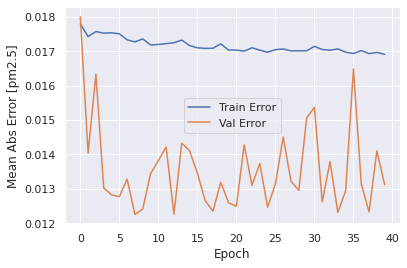

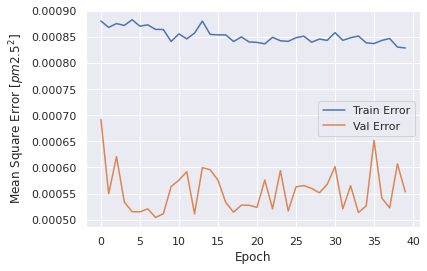

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [pm2.5]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$pm2.5^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')

  plt.legend()
  plt.show()


plot_history(history)

<font color='green'>**Fin Actividad 2**</font>

## <font color='green'>**Actividad 3**</font>

Evalue el resultado del modelo (30 minutos). Utilice
1. Mae
2. R2
3. Grafico de linea.

Se hacen predicciones para el pm2.5 del modelo mejor guardado. Las predicciones del modelo, que están en el pm2.5 escalado, se transforman inversamente para obtener predicciones del pm2.5 original.

In [ ]:
best_model = load_model('/content/drive/MyDrive/Cursos/Data Science UDD/Deep Learning/PRSA_data_PM2.5_MLP_weights.16-0.0119.hdf5')
preds = best_model.predict(X_val)
pred_pm25 = scaler.inverse_transform(preds)
pred_pm25 = np.squeeze(pred_pm25)

In [ ]:
print(X_val.shape)

(8654, 7)


In [ ]:
y_val_scaled = scaler.inverse_transform([y_val])
y_val_scaled = np.squeeze(y_val_scaled)
y_val_scaled.max()

671.0

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
print(f'MAE: {mean_absolute_error(y_val_scaled, pred_pm25)}\n')
print(f'R2: {r2_score(y_val_scaled, pred_pm25)}\n')

MAE: 11.787335450004038

R2: 0.9451132056377687



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


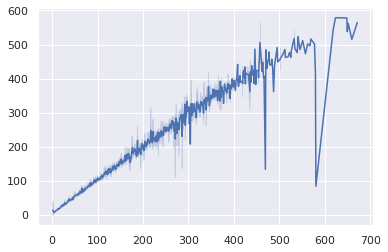

In [ ]:
sns.lineplot(y_val_scaled, pred_pm25)

<font color='green'>**Fin Actividad 3**</font>